### Question 1

Probability of employees using Health Insurance: 0.7

prob. of employees using health insurance who are smokers : 0.4

probability that an employee is a smoker given that he/she uses the health insurance plan 

=  prob (employee using health insurance / smoker) * prob (employee using health insurance)

=  0.4 * 0.7

=  0.28

### Question 2

Difference between Multinomial NB and Bernoulli NB :

- Mutlinomial Nb works with features having multiple occurences or more than two categories
- Bernoulli NB works with features having binary or boolean categories

### Question 3

Yes gaussian Nb can be used for multiclass classification 

### Question 4

Naive Bayes apparently handles missing data differently, depending on whether they exist in training or testing/classification instances.

When classifying instances, the attribute with the missing value is simply not included in the probability calculation

In training, the instance [with the missing data] is not included in frequency count for attribute value-class combination.

### Question 5

In [3]:
import pandas as pd
import numpy as np

In [4]:
word_features = [
    "word_freq_make",
    "word_freq_address",
    "word_freq_all",
    "word_freq_3d",
    "word_freq_our",
    "word_freq_over",
    "word_freq_remove",
    "word_freq_internet",
    "word_freq_order",
    "word_freq_mail",
    "word_freq_receive",
    "word_freq_will",
    "word_freq_people",
    "word_freq_report",
    "word_freq_addresses",
    "word_freq_free",
    "word_freq_business",
    "word_freq_email",
    "word_freq_you",
    "word_freq_credit",
    "word_freq_your",
    "word_freq_font",
    "word_freq_000",
    "word_freq_money",
    "word_freq_hp",
    "word_freq_hpl",
    "word_freq_george",
    "word_freq_650",
    "word_freq_lab",
    "word_freq_labs",
    "word_freq_telnet",
    "word_freq_857",
    "word_freq_data",
    "word_freq_415",
    "word_freq_85",
    "word_freq_technology",
    "word_freq_1999",
    "word_freq_parts",
    "word_freq_pm",
    "word_freq_direct",
    "word_freq_cs",
    "word_freq_meeting",
    "word_freq_original",
    "word_freq_project",
    "word_freq_re",
    "word_freq_edu",
    "word_freq_table",
    "word_freq_conference",
    "char_freq_;",
    "char_freq_(",
    "char_freq_[",
    "char_freq_!",
    "char_freq_$",
    "char_freq_#",
    "capital_run_length_average",
    "capital_run_length_longest",
    "capital_run_length_total",
    "Class"
]


In [5]:
df = pd.read_csv("spambase.data", names = word_features)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
print(f"Shape of X : {X.shape}, and y : {y.shape}")

Shape of X : (4601, 57), and y : (4601,)


In [13]:
# Importing the libraries

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB,CategoricalNB,GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

In [10]:
X_train ,X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size = 0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3680, 57) (921, 57) (3680,) (921,)


## Base performance for the classifiers

### 1. Bernoulli Naive Bayes 

In [12]:
model_bernoulii = BernoulliNB()
model_bernoulii

BernoulliNB()

In [14]:
model_bernoulii.fit(X_train, y_train)
y_pred = model_bernoulii.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       538
           1       0.88      0.82      0.85       383

    accuracy                           0.88       921
   macro avg       0.88      0.87      0.87       921
weighted avg       0.88      0.88      0.88       921



In [16]:
accuracy_score(y_test, y_pred)

0.8773072747014115

In [17]:
recall_score(y_test, y_pred)

0.8172323759791122

In [18]:
precision_score(y_test, y_pred)

0.8792134831460674

In [19]:
f1_score(y_test, y_pred)

0.8470906630581867

### 2. Gaussian Naive Bayes

In [20]:
model_gauss = GaussianNB()
model_gauss

GaussianNB()

In [21]:
model_gauss.fit(X_train, y_train)
y_pred = model_gauss.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.72      0.81       538
           1       0.70      0.93      0.80       383

    accuracy                           0.81       921
   macro avg       0.82      0.82      0.81       921
weighted avg       0.84      0.81      0.81       921



In [23]:
accuracy_score(y_test, y_pred)

0.8067318132464713

In [24]:
recall_score(y_test, y_pred)

0.9321148825065274

In [25]:
precision_score(y_test, y_pred)

0.7013752455795678

In [26]:
f1_score(y_test, y_pred)

0.8004484304932735

### 3. MultiNomial NB

In [28]:
model_mutlinom = MultinomialNB()
model_mutlinom

MultinomialNB()

In [29]:
model_mutlinom.fit(X_train, y_train)
y_pred = model_mutlinom.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       538
           1       0.78      0.77      0.77       383

    accuracy                           0.81       921
   macro avg       0.81      0.81      0.81       921
weighted avg       0.81      0.81      0.81       921



In [31]:
accuracy_score(y_test, y_pred)

0.8121606948968513

In [32]:
recall_score(y_test, y_pred)

0.7676240208877284

In [33]:
precision_score(y_test, y_pred)

0.7777777777777778

In [34]:
f1_score(y_test, y_pred)

0.7726675427069646

## Checking using Grid Search CV for hyperparameters

In [44]:
from sklearn.model_selection import GridSearchCV
import warnings

In [45]:
warnings.filterwarnings("ignore")

### 1. Bernoulli Naive Bayes 

In [59]:
param_bernoulli = {"alpha" : [0.001, 0.01, 0.1, 0, 1, 10, 100]}

model = GridSearchCV(BernoulliNB(), param_grid = param_bernoulli, cv = 10, verbose = 3, scoring= accuracy_score, return_train_score=True)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV 1/10] END ......alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10] END ......alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10] END ......alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10] END ......alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/10] END ......alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 6/10] END ......alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/10] END ......alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 8/10] END ......alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10] END ......alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 10/10] END .....alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/10] END .......alpha=0.01;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10] END .......alpha=0.01;, score=(train=n

0.8794788273615635

In [60]:
model.best_params_

{'alpha': 0.001}

### 2. GaussianNB

In [64]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

model = GridSearchCV(GaussianNB(), param_grid=params_NB,cv = 10, verbose = 3, scoring= accuracy_score, return_train_score=True)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END var_smoothing=1.0;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10] END var_smoothing=1.0;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10] END var_smoothing=1.0;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10] END var_smoothing=1.0;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/10] END var_smoothing=1.0;, score=(train=nan, test=nan) total time=   0.0s
[CV 6/10] END var_smoothing=1.0;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/10] END var_smoothing=1.0;, score=(train=nan, test=nan) total time=   0.0s
[CV 8/10] END var_smoothing=1.0;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10] END var_smoothing=1.0;, score=(train=nan, test=nan) total time=   0.0s
[CV 10/10] END var_smoothing=1.0;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/10] END var_smoothing=0.8111308307896871;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10] END var_smoothing=

0.6210640608034745

In [65]:
model.best_params_

{'var_smoothing': 1.0}

### 3. Multinomial NB

In [66]:
param_grid = {"alpha" : [0.001, 0.01, 0.1, 0, 1, 10, 100]}

model = GridSearchCV(MultinomialNB(), param_grid = param_grid, cv = 10, verbose = 3, scoring= accuracy_score, return_train_score=True)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV 1/10] END ......alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10] END ......alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10] END ......alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10] END ......alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/10] END ......alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 6/10] END ......alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/10] END ......alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 8/10] END ......alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 9/10] END ......alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 10/10] END .....alpha=0.001;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/10] END .......alpha=0.01;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10] END .......alpha=0.01;, score=(train=n

0.8132464712269273

## Results 

### Accuracy Score for each classifier after hyperparamter tuning 

1. Bernoulli NB : 87%
2. Multinomial NB: 81%
3. Gaussian NB : 67%

- Bernoulli Naive Bayes performed the best out of all
- 

## EDA

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
cor = df.corr()
highest_corr = cor["Class"][cor["Class"] > 0.3].index

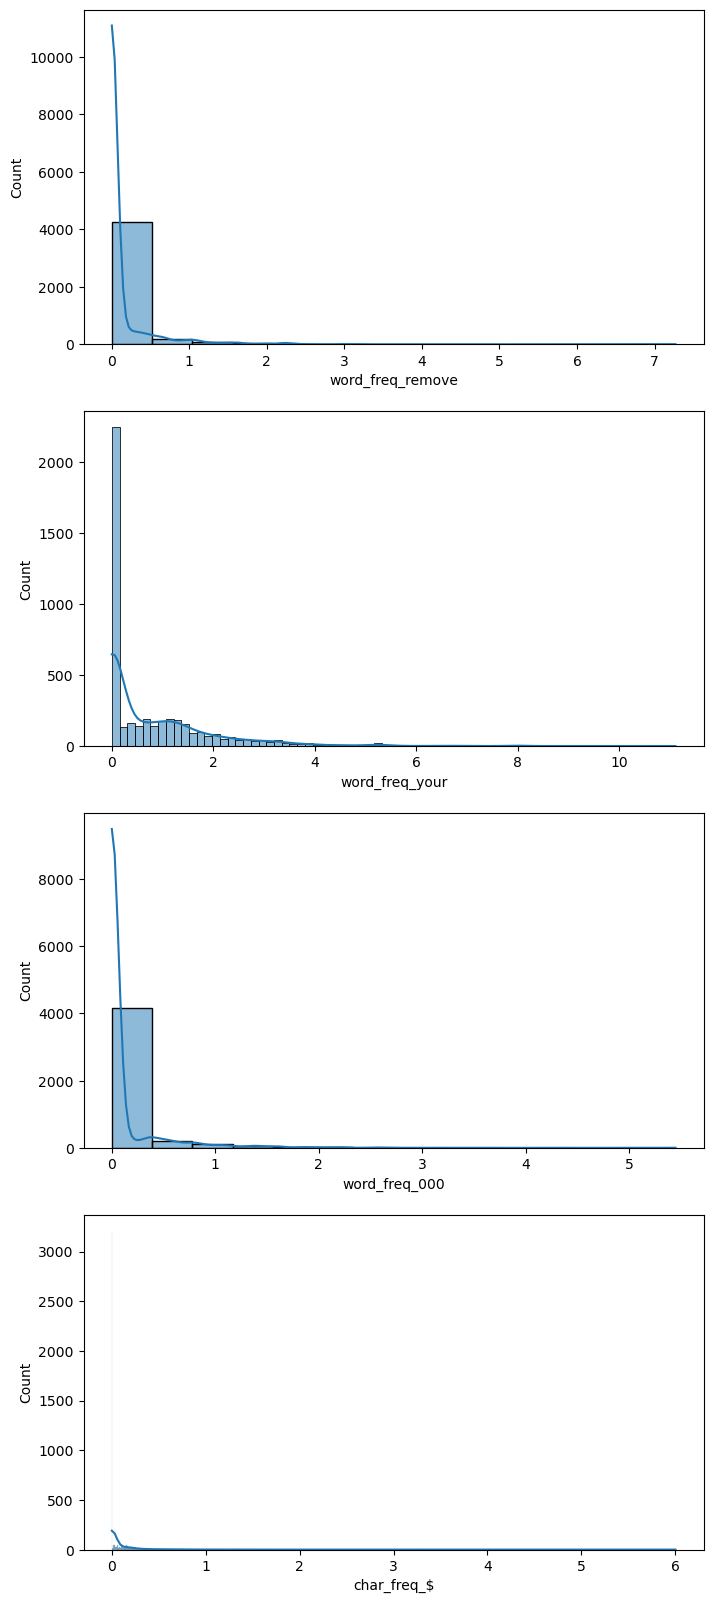

In [121]:
fig, ax= plt.subplots(4, 1, figsize = (8,20))

for i, v in enumerate(highest_corr[:-1]):
    sns.histplot(df, x = v, ax = ax[i], kde = True)